In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#loading the dataset
df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz',compression='gzip')

/tmp/ipykernel_37/1546706361.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz',compression='gzip')


In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(2260701, 151)

### 

In [6]:
#checking the missing values in the dataset
df.isna().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [7]:
#getting the information about the columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [16]:
df=df.drop(df.loc[:,df.isna().mean()>0.30].columns,axis=1)

In [23]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.00,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.00,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,m

In [25]:
df=df.dropna(axis=0).reset_index(drop=True)

In [26]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
3,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,550xx,MN,14.67,0.0,Jun-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.00,0.00,21393.800000,21393.80,20000.00,1393.80,0.0,0.0,0.0,Nov-2016,15681.05,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N
4,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDet

In [27]:
df.isna().sum().sum()

0

In [40]:
UNNEEDED_COLUMNS=['id','url','sub_grade','emp_title','title','zip_code']

In [42]:
df=df.drop(UNNEEDED_COLUMNS,axis=1)

In [43]:
DATE_COLUMN=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [44]:
df[DATE_COLUMN]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-2015,Aug-2003,Jan-2019,Mar-2019
1,Dec-2015,Dec-1999,Jun-2016,Mar-2019
2,Dec-2015,Jun-1998,Jul-2016,Mar-2018
3,Dec-2015,Jun-1990,Nov-2016,Mar-2019
4,Dec-2015,Feb-1999,Jan-2017,Mar-2019
...,...,...,...,...
1652447,Oct-2016,Jun-2011,Mar-2017,Dec-2018
1652448,Oct-2016,Aug-1997,Mar-2018,Mar-2019
1652449,Oct-2016,Feb-2001,Mar-2019,Mar-2019
1652450,Oct-2016,Feb-1991,Mar-2019,Mar-2019


In [45]:
for column in DATE_COLUMN:
    df[column+'_year']=df[column].apply(lambda x:x.split('-')[1]).astype(int)

In [46]:
for column in DATE_COLUMN:
    df[column+'_month']=df[column].apply(lambda x:x.split('-')[0])

In [47]:
df=df.drop(DATE_COLUMN,axis=1)

In [60]:
MONTH_LIST=list(df['issue_d_month'].unique())

In [63]:
MONTH_LIST=MONTH_LIST[::-1]


In [66]:
MONTH_LIST.index("Feb")

1

In [71]:
for column in df.columns[-4:]:
    df[column]=df[column].apply(lambda x:MONTH_LIST.index(x))


In [73]:
for column in df.columns[-4:]:
    df[column]=df[column].astype(int)

In [75]:
df['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [77]:
df['debt_settlement_flag']=df['debt_settlement_flag'].replace({'N':0,'Y':1})

/tmp/ipykernel_37/3709032966.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['debt_settlement_flag']=df['debt_settlement_flag'].replace({'N':0,'Y':1})


In [80]:
df['disbursement_method']=df['disbursement_method'].replace({'Cash':0, 'DirectPay':1})

/tmp/ipykernel_37/3630495445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['disbursement_method']=df['disbursement_method'].replace({'Cash':0, 'DirectPay':1})


In [83]:
df['hardship_flag']=df['hardship_flag'].replace({'N':0,"Y":1})

/tmp/ipykernel_37/895924405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hardship_flag']=df['hardship_flag'].replace({'N':0,"Y":1})


In [86]:
df['application_type']=df['application_type'].replace({'Individual':0, 'Joint App':1})

/tmp/ipykernel_37/52655619.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type']=df['application_type'].replace({'Individual':0, 'Joint App':1})


In [89]:
df['initial_list_status']=df['initial_list_status'].replace({'w':0,'f':1})

/tmp/ipykernel_37/3342643940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['initial_list_status']=df['initial_list_status'].replace({'w':0,'f':1})


In [92]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [91]:
df['addr_state'].unique()

array(['PA', 'SD', 'MN', 'SC', 'RI', 'TX', 'CA', 'VA', 'AZ', 'NY', 'MD',
       'KS', 'NM', 'AL', 'WA', 'MO', 'OH', 'GA', 'IL', 'FL', 'CO', 'IN',
       'MI', 'LA', 'DC', 'MA', 'WI', 'NJ', 'DE', 'TN', 'NH', 'NE', 'OR',
       'NC', 'AR', 'NV', 'WV', 'HI', 'WY', 'KY', 'OK', 'CT', 'VT', 'MS',
       'UT', 'ND', 'ME', 'AK', 'MT', 'ID', 'IA'], dtype=object)

In [93]:
df=onehot_encode(df,'addr_state')

In [95]:
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'major_purchase',
       'credit_card', 'home_improvement', 'house', 'other', 'car',
       'medical', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [96]:
df=onehot_encode(df,'purpose')

In [98]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [99]:
df['pymnt_plan']=df['pymnt_plan'].replace({'n':0,'y':1})

/tmp/ipykernel_37/595009105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pymnt_plan']=df['pymnt_plan'].replace({'n':0,'y':1})


In [101]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [103]:
df=onehot_encode(df,'loan_status')

In [106]:
df['verification_status']=df['verification_status'].replace({'Not Verified':0, 'Source Verified':1, 'Verified':2})

/tmp/ipykernel_37/3914242683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status']=df['verification_status'].replace({'Not Verified':0, 'Source Verified':1, 'Verified':2})


In [109]:
df['home_ownership']=df['home_ownership'].replace({'MORTGAGE':0, 'RENT':1, 'OWN':2, 'ANY':3, 'NONE':4, 'OTHER':4})

/tmp/ipykernel_37/3327318342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['home_ownership']=df['home_ownership'].replace({'MORTGAGE':0, 'RENT':1, 'OWN':2, 'ANY':3, 'NONE':4, 'OTHER':4})


In [112]:
df['emp_length']=df['emp_length'].replace({'10+ years':10, '3 years':3, '6 years':6, '1 year':1, '7 years':7, '8 years':8,
       '5 years':5, '2 years':2, '9 years':9, '< 1 year':0, '4 years':4})

/tmp/ipykernel_37/3443772386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length']=df['emp_length'].replace({'10+ years':10, '3 years':3, '6 years':6, '1 year':1, '7 years':7, '8 years':8,


In [115]:
df['term']=df['term'].replace({' 36 months':0, ' 60 months':1})

/tmp/ipykernel_37/3362004346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['term']=df['term'].replace({' 36 months':0, ' 60 months':1})


In [121]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(int)

In [123]:
[column for column in df.columns if df[column].dtype=='object']

['grade']

In [124]:
df['grade'].unique()

array(['C', 'F', 'B', 'A', 'E', 'D', 'G'], dtype=object)

In [126]:
df['grade']=df['grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

/tmp/ipykernel_37/2767712890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade']=df['grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})


In [127]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_year,earliest_cr_line_year,last_pymnt_d_year,last_credit_pull_d_year,issue_d_month,earliest_cr_line_month,last_pymnt_d_month,last_credit_pull_d_month,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,10,0,55000.0,0,0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2015,2003,2019,2019,11,7,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,0,65000.0,0,0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,2015,1999,2016,2019,11,11,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,10400.0,10400.0,10400.0,1,22.45,289.91,5,3,0,104433.0,1,0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,

In [128]:
y=df['grade']
x=df.drop('grade',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)

In [129]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

In [130]:
x_train.shape

(1156716, 159)

# Model Construction

In [132]:
inputs=tf.keras.Input(shape=(159,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(7,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=20
history=model.fit(x_train,y_train,validation_split=0.7,batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/20


I0000 00:00:1726909760.344579     140 service.cc:145] XLA service 0x7da96c004380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726909760.344629     140 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726909760.344633     140 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  108/10845 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.3074 - loss: 1.6794 

I0000 00:00:1726909761.896581     140 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10845/10845 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.8071 - loss: 0.4728 - val_accuracy: 0.9226 - val_loss: 0.1898 - learning_rate: 0.0010
Epoch 2/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9330 - loss: 0.1636 - val_accuracy: 0.9448 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 3/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9461 - loss: 0.1302 - val_accuracy: 0.9504 - val_loss: 0.1195 - learning_rate: 0.0010
Epoch 4/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9541 - loss: 0.1126 - val_accuracy: 0.9584 - val_loss: 0.1025 - learning_rate: 0.0010
Epoch 5/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9596 - loss: 0.0985 - val_accuracy: 0.9591 - val_loss: 0.1018 - learning_rate: 0.0010
Epoch 6/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9637 - loss: 0.0893 - val_accuracy: 0.9647 - val_loss: 0.0877 - learning_rate: 0.0010
Epoch 7/20
10845/10845 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 

# Results

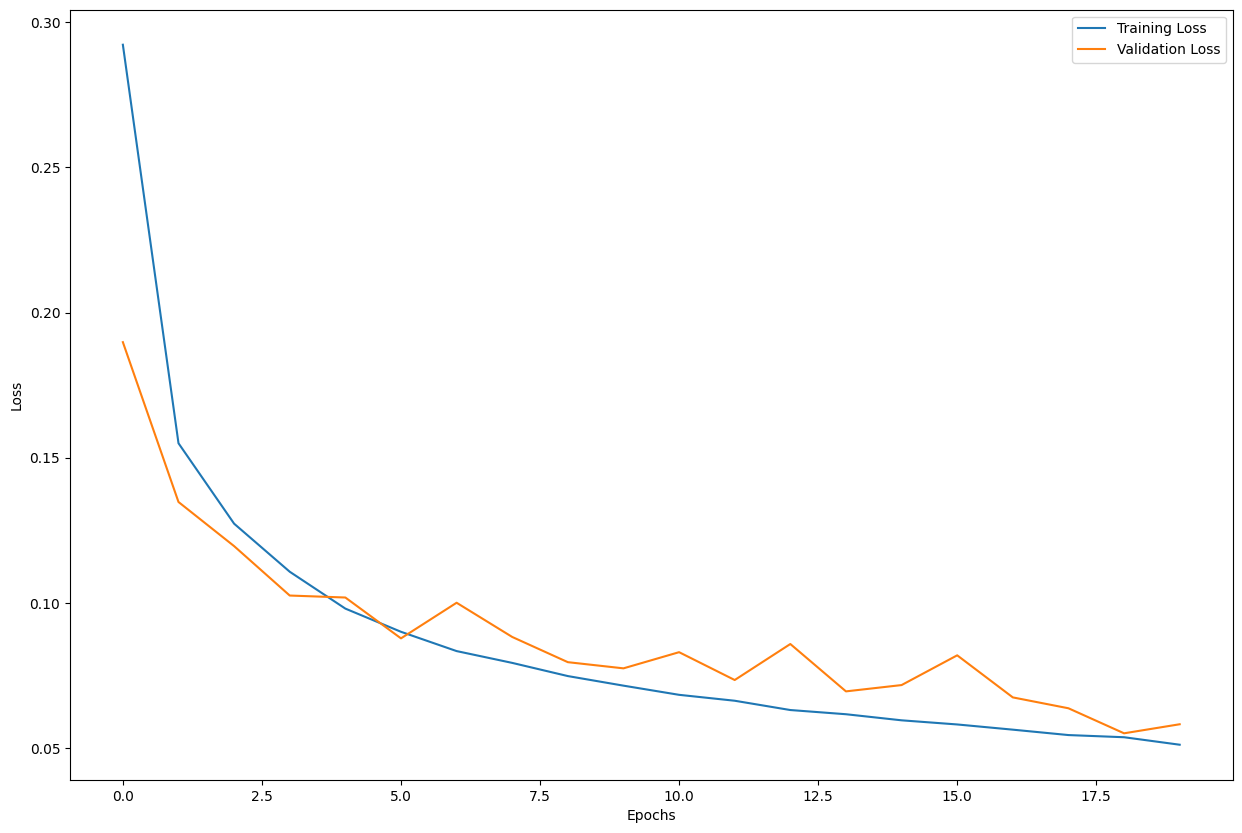

In [133]:
plt.figure(figsize=(15,10))
epochs_range=range(epochs)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [137]:
model.evaluate(x_test,y_test)

15492/15492 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9779 - loss: 0.0585


[0.05847492814064026, 0.978079080581665]

In [136]:
np.squeeze(model.predict(x_test))

15492/15492 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


array([[1.0434607e-20, 1.0000000e+00, 7.3347842e-19, ..., 3.5000425e-34,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2267857e-13, 1.0000000e+00, ..., 1.1704626e-40,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0369609e-43, 2.8127761e-05, ..., 1.0582314e-19,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.1605075e-15, 4.3359628e-27, 2.4275764e-04, ..., 2.0117093e-05,
        5.2539918e-17, 2.1014202e-33],
       [0.0000000e+00, 0.0000000e+00, 2.3893341e-20, ..., 1.5350462e-07,
        8.8279377e-22, 7.9257441e-42],
       [1.2359500e-04, 9.9987638e-01, 7.8288931e-16, ..., 2.0742024e-26,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [138]:
import numpy as np

# Example softmax output (3 rows of probabilities, truncated)
probabilities = np.squeeze(model.predict(x_test))

# Get predicted class (index of maximum value per row)
predicted_classes = np.argmax(probabilities, axis=1)
print(predicted_classes)


15492/15492 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
[1 2 3 ... 3 3 1]


In [141]:
cm=confusion_matrix(predicted_classes,y_test)
cm

array([[ 90351,   1486,     36,     16,      5,      0,      0],
       [  1341, 140154,    526,      1,      0,      1,      0],
       [    46,   1599, 144636,    675,      9,      2,      2],
       [     3,      0,    299,  70326,    964,      0,      2],
       [     0,      2,      3,   1184,  28968,    509,      2],
       [     0,      0,      0,      6,    657,   8574,    957],
       [     0,      0,      0,      0,      0,    534,   1860]])

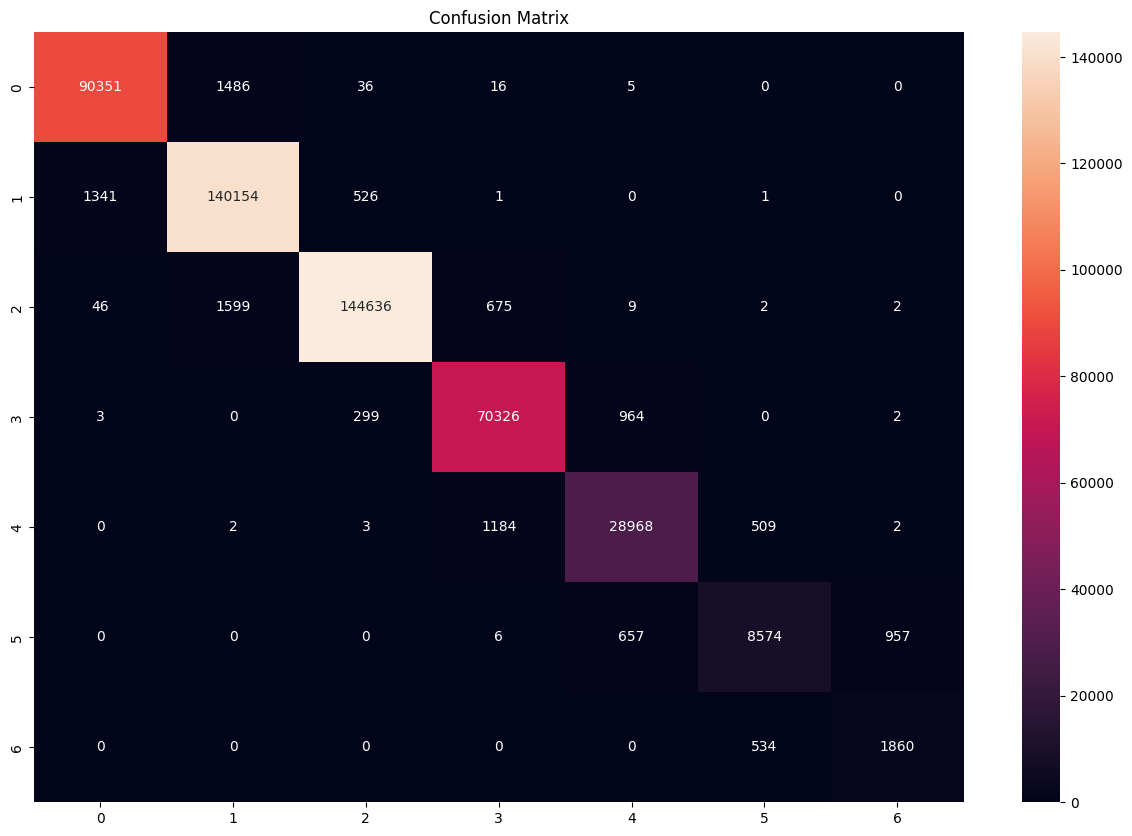

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [144]:
clr=classification_report(predicted_classes,y_test)

In [145]:
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     91894
           1       0.98      0.99      0.98    142023
           2       0.99      0.98      0.99    146969
           3       0.97      0.98      0.98     71594
           4       0.95      0.94      0.95     30668
           5       0.89      0.84      0.87     10194
           6       0.66      0.78      0.71      2394

    accuracy                           0.98    495736
   macro avg       0.92      0.93      0.92    495736
weighted avg       0.98      0.98      0.98    495736



In [41]:
{
    column:list(df[column].unique()) for column in df.drop(UNNEEDED_COLUMNS,axis=1).columns if df[column].dtype=='object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['C', 'F', 'B', 'A', 'E', 'D', 'G'],
 'emp_length': ['10+ years',
  '3 years',
  '6 years',
  '1 year',
  '7 years',
  '8 years',
  '5 years',
  '2 years',
  '9 years',
  '< 1 year',
  '4 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'issue_d': ['Dec-2015',
  'Nov-2015',
  'Oct-2015',
  'Sep-2015',
  'Aug-2015',
  'Jul-2015',
  'Jun-2015',
  'May-2015',
  'Apr-2015',
  'Mar-2015',
  'Feb-2015',
  'Jan-2015',
  'Mar-2018',
  'Feb-2018',
  'Jan-2018',
  'Sep-2017',
  'Aug-2017',
  'Jul-2017',
  'Jun-2016',
  'May-2016',
  'Apr-2016',
  'Sep-2018',
  'Aug-2018',
  'Jul-2018',
  'Jun-2017',
  'May-2017',
  'Apr-2017',
  'Mar-2016',
  'Feb-2016',
  'Jan-2016',
  'Dec-2014',
  'Nov-2014',
  'Oct-2014',
  'Sep-2014',
  'Aug-2014',
  'Jul-2014',
  'Jun-2014',
  'May-2014',
  'Apr-2014',
  'Mar-2014',
  'Feb-2014',
  'Jan-2014',
  'Dec-201